In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data_folder1 = "../traces/puf0_avg100/all/"
data_folder2 = "../traces/puf12_avg100/all/"

size = 150

In [3]:
def load_traces(data_folder, n_traces):
    traces = np.load(data_folder+'trace.npy')
    labels = np.load(data_folder+'label.npy')

    for i in range(1, n_traces):  
        tempTrace = np.load(data_folder+'trace'+str(i)+'.npy')
        tempLabel = np.load(data_folder+'label'+str(i)+'.npy')

        traces = np.append(traces,tempTrace,axis=0)
        labels = np.append(labels,tempLabel,axis=0)

    print(traces.shape)
    print(labels.shape)
    return traces, labels

In [4]:
def t_test(traces, labels):
    tempLabels = []
    for i in range(labels.size):
        tempLabels += list(np.binary_repr(labels[i], width = 1))
    delimitedLabels = np.array(tempLabels).astype(int)

    trace_0 = traces[np.where(delimitedLabels == 0)]
    trace_1 = traces[np.where(delimitedLabels == 1)]

    (statistic,pvalue) = stats.ttest_ind(trace_0, trace_1, equal_var = False)

    plt.plot(statistic) 
    plt.ylabel('SOST value')
    plt.xlabel('trace point')

    m_index = statistic.argsort()[-5:][::-1]
    print(m_index)

    tmp = statistic[m_index][0]
    print('max SOST value =', tmp)

    plt.show()

In [5]:
def main(folder, n):
    traces, labels = load_traces(folder, n)
    t_test(traces, labels)

(100000, 150)
(100000,)
[  1 129  88   2   5]
max SOST value = 29.64597157526155


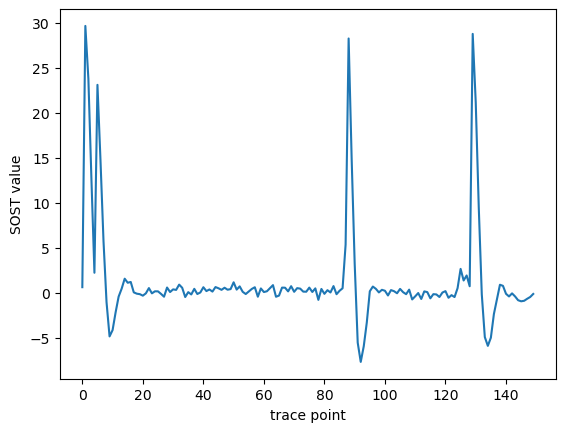

In [6]:
main(data_folder1, 10)

(50000, 150)
(50000,)
[ 88   1   2 129  89]
max SOST value = 81.60469432542749


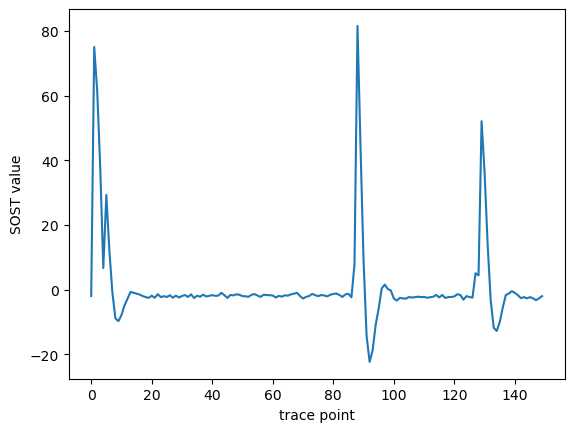

In [7]:
main(data_folder2, 5)